In [1]:
%%time
print("start")
%run -i 'myimports.py'
# %run -i "youtube_extraction.py"
# %run -i "nlp_processing.py"
%run -i "timestamp_generation"
%run -i "datagathering"


#get collection of documents (minute of podcast) in a list
main="https://www.happyscribe.com/public/lex-fridman-podcast-artificial-intelligence-ai/"
transfolder ="3Lex/"
timesfolder="lextimestamps2/"
url="101-joscha-bach-artificial-consciousness-and-the-nature-of-reality"
file = "#101|Joscha_Bach|Artificial_Consciousness_and_the_Nature_of_Reality.txt"

write_specific(main, url, transfolder)
document_size = 1000
topic_size = 2000

soup = BeautifulSoup(requests.get(main+url).text,"html.parser")


dictionary, model = generate_model(transfolder+file, document_size, topic_size)
sents = list(map(contractions.fix, re.split("(?<=[.?!])\s", open(transfolder+file).read())))

one_topic_confi = load_confidences(transfolder+file, topic_size, dictionary, model, sents, basic_completion) #get top topic predictions for each sentence
top_confi = np.zeros([int(pod_word_count(transfolder+file)/topic_size), len(sents)])
algo_timestamps=get_algo_timestamps(sents)
timestamp_array = get_real_timestamps(soup, sents, timesfolder, file)

start
CPU times: user 9.27 s, sys: 2.22 s, total: 11.5 s
Wall time: 18.2 s


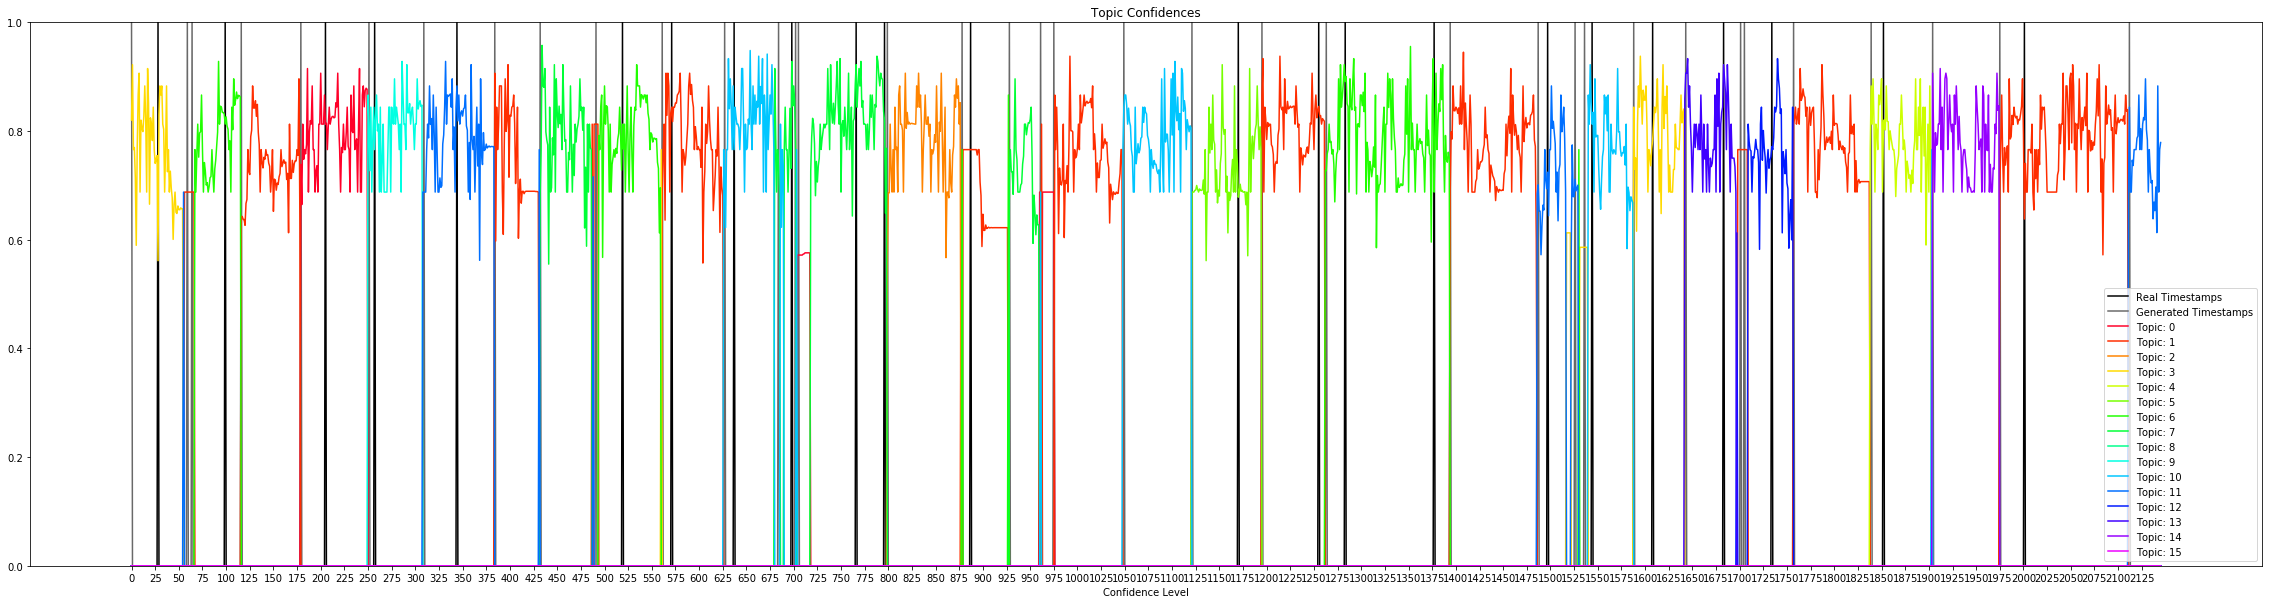

In [3]:
NUM_COLORS = int(pod_word_count(transfolder+file)/topic_size)
cm = plt.get_cmap('gist_rainbow')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_prop_cycle('color', [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
plt.title("Topic Confidences")
plt.xlabel("Sentence Number")
plt.xticks(np.arange(0, len(sents), 25))
plt.xlabel("Confidence Level")
plt.ylim(0,1)

x = np.arange(0, len(sents))
plt.plot(x, timestamp_array, label="Real Timestamps", color="black")
plt.plot(x, algo_timestamps, label="Generated Timestamps", color="dimgrey")

for ind, i in enumerate(one_topic_confi): #set graph
    top_confi[int(i[0])][ind] = i[1]
    
for i in range(int(pod_word_count(transfolder+file)/topic_size)):
    plt.plot(x,top_confi[i], label="Topic: "+str(i))

plt.legend()
plt.rcParams['figure.figsize'] = [40, 10]
plt.show()